In [93]:
# <1> 
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import math
from zipfile import ZipFile

In [94]:
# <2> 

import os  
    
# Get the current working  
# directory (CWD)  
cwd = os.getcwd()  
    
# Print the current working   
# directory (CWD)  
# which is root in this case 
print("Current working directory is:", cwd) 


Current working directory is: C:\Users\Administrator


In [95]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# <4> 
# The folder contains files that are not the yearly data files
FILE_PATH = "CollegeScorecard_Raw_Data"
file_names = os.listdir(FILE_PATH)
file_names = [x for x in file_names if x.startswith("MERGED")]
file_names

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [96]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

df1 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED1996_97_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df1
df1.insert(2, "1997", 1997) 
df1

,UNITID,INSTNM,1997,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
0,100636,Community College of the Air Force,1997,AL,0,NaN,NaN
1,100654,Alabama A & M University,1997,AL,5,NaN,NaN
2,100663,University of Alabama at Birmingham,1997,AL,5,NaN,NaN
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,1997,AL,5,NaN,NaN
4,100690,Amridge University,1997,AL,5,NaN,NaN
...,...,...,...,...,...,...,...
7002,428347,American Institute of Medical-Dental Technology,1997,UT,7,NaN,NaN
7003,428365,INSTITUTO DE ESTETICA Y BELLAZA MARUGIE,1997,PR,9,NaN,NaN
7004,428374,KEISER COLLEGE-DAYTONA,1997,FL,5,NaN,NaN
7005,428392,Klamath Community College,1997,OR,8,NaN,NaN


In [88]:
df2 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED1997_98_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df2
df2.insert(2, "1998", 1998) 
df2

,UNITID,INSTNM,1998,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
0,100636,Community College of the Air Force,1998,AL,0,NaN,NaN
1,100654,Alabama A & M University,1998,AL,5,NaN,NaN
2,100663,University of Alabama at Birmingham,1998,AL,5,NaN,NaN
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,1998,AL,5,NaN,NaN
4,100690,Amridge University,1998,AL,5,NaN,NaN
...,...,...,...,...,...,...,...
6929,432418,MANHATTAN BEAUTY SCHOOL,1998,FL,5,NaN,NaN
6930,432436,COOPER CAREER INSTITUTE,1998,VA,5,NaN,NaN
6931,432445,OCCUPATIONAL TRAINING CENTER,1998,AZ,6,NaN,NaN
6932,432472,ABC SPA CITY BEAUTY AND BARBER COLLEGE,1998,AR,5,NaN,NaN


In [80]:
df1 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED1996_97_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df1.insert(2, "1997", 1997) 
df2 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED1997_98_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df1.insert(2, "1998", 1998) 
df3 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED1998_99_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df3.insert(2, "1999", 1999) 
df4 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED1999_00_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df4.insert(2, "2000", 2000) 

In [91]:
df1["df"] = 1
df2["df"] = 2
df3["df"] = 3
df4["df"] = 4
df = pd.concat([df1, df2,df3,df4])
df

,UNITID,INSTNM,1998,1997,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,df,1999,2000
0,100636,Community College of the Air Force,1998.0,1997.0,AL,0,NaN,NaN,1,NaN,NaN
1,100654,Alabama A & M University,1998.0,1997.0,AL,5,NaN,NaN,1,NaN,NaN
2,100663,University of Alabama at Birmingham,1998.0,1997.0,AL,5,NaN,NaN,1,NaN,NaN
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,1998.0,1997.0,AL,5,NaN,NaN,1,NaN,NaN
4,100690,Amridge University,1998.0,1997.0,AL,5,NaN,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6604,436784,Universal Career Community College Inc,NaN,NaN,PR,9,NaN,NaN,4,NaN,2000.0
6605,436809,Willsey Institute,NaN,NaN,NY,2,NaN,NaN,4,NaN,2000.0
6606,437042,ITT Technical Institute-Saint Rose,NaN,NaN,LA,5,NaN,NaN,4,NaN,2000.0
6607,437413,EURO HAIR DESIGN INSTITUTE,NaN,NaN,FL,5,NaN,NaN,4,NaN,2000.0


In [92]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

df.shape

(27252, 11)

In [97]:
df.head(5)

,UNITID,INSTNM,1998,1997,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,df,1999,2000
0,100636,Community College of the Air Force,1998.0,1997.0,AL,0,NaN,NaN,1,NaN,NaN
1,100654,Alabama A & M University,1998.0,1997.0,AL,5,NaN,NaN,1,NaN,NaN
2,100663,University of Alabama at Birmingham,1998.0,1997.0,AL,5,NaN,NaN,1,NaN,NaN
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,1998.0,1997.0,AL,5,NaN,NaN,1,NaN,NaN
4,100690,Amridge University,1998.0,1997.0,AL,5,NaN,NaN,1,NaN,NaN


In [69]:
df.tail(5)

,UNITID,INSTNM,1997,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,df,1998
INSTNM,,,,,,,,,
University of Maryland-Baltimore County,163268,University of Maryland-Baltimore County,1997.0,MD,2,NaN,NaN,1,NaN
University of Maryland-Baltimore County,163268,University of Maryland-Baltimore County,NaN,MD,2,NaN,NaN,2,1998.0


In [33]:
df.sample

<bound method NDFrame.sample of       UNITID                                  INSTNM    1997 STABBR  REGION  \
0     100636      Community College of the Air Force  1997.0     AL       0   
1     100654                Alabama A & M University  1997.0     AL       5   
2     100663     University of Alabama at Birmingham  1997.0     AL       5   
3     100672  ALABAMA AVIATION AND TECHNICAL COLLEGE  1997.0     AL       5   
4     100690                      Amridge University  1997.0     AL       5   
...      ...                                     ...     ...    ...     ...   
6929  432418                 MANHATTAN BEAUTY SCHOOL     NaN     FL       5   
6930  432436                 COOPER CAREER INSTITUTE     NaN     VA       5   
6931  432445            OCCUPATIONAL TRAINING CENTER     NaN     AZ       6   
6932  432472  ABC SPA CITY BEAUTY AND BARBER COLLEGE     NaN     AR       5   
6933  432524      Delaware College of Art and Design     NaN     DE       2   

      ADM_RATE  TUI

In [72]:
df.describe

<bound method NDFrame.describe of                                          UNITID  \
INSTNM                                            
University of Maryland-Baltimore County  163268   
University of Maryland-Baltimore County  163268   

                                                                          INSTNM  \
INSTNM                                                                             
University of Maryland-Baltimore County  University of Maryland-Baltimore County   
University of Maryland-Baltimore County  University of Maryland-Baltimore County   

                                           1997 STABBR  REGION  ADM_RATE  \
INSTNM                                                                     
University of Maryland-Baltimore County  1997.0     MD       2       NaN   
University of Maryland-Baltimore County     NaN     MD       2       NaN   

                                         TUITIONFEE_IN  df    1998  
INSTNM                                            

In [73]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, University of Maryland-Baltimore County to University of Maryland-Baltimore County
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         2 non-null      int64  
 1   INSTNM         2 non-null      object 
 2   1997           1 non-null      float64
 3   STABBR         2 non-null      object 
 4   REGION         2 non-null      int64  
 5   ADM_RATE       0 non-null      float64
 6   TUITIONFEE_IN  0 non-null      float64
 7   df             2 non-null      int64  
 8   1998           1 non-null      float64
dtypes: float64(4), int64(3), object(2)
memory usage: 160.0+ bytes


In [82]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.


df = df.set_index( "INSTNM", drop = False) # Find and display, selects the column "INSTMN" then filters to "Loyola", can filter out later for Tuition Info
df.loc["University of Maryland-Baltimore County"]


,UNITID,INSTNM,1998,1997,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,df
INSTNM,,,,,,,,,
University of Maryland-Baltimore County,163268,University of Maryland-Baltimore County,1998.0,1997.0,MD,2,NaN,NaN,1
University of Maryland-Baltimore County,163268,University of Maryland-Baltimore County,NaN,NaN,MD,2,NaN,NaN,2


In [86]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

df = df.set_index( "INSTNM", drop = False) # Find and display, selects the column "INSTMN" then filters to "Loyola", can filter out later for Tuition Info
df.loc["University of Maryland-Baltimore County"]
df=df.loc["University of Maryland-Baltimore County"]
df

,UNITID,INSTNM,1998,1997,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,df,1999,2000
INSTNM,,,,,,,,,,,
University of Maryland-Baltimore County,163268,University of Maryland-Baltimore County,1998.0,1997.0,MD,2,NaN,NaN,1,NaN,NaN
University of Maryland-Baltimore County,163268,University of Maryland-Baltimore County,NaN,NaN,MD,2,NaN,NaN,2,NaN,NaN
University of Maryland-Baltimore County,163268,University of Maryland-Baltimore County,NaN,NaN,MD,2,NaN,NaN,3,1999.0,NaN
University of Maryland-Baltimore County,163268,University of Maryland-Baltimore County,NaN,NaN,MD,2,NaN,NaN,4,NaN,2000.0


In [74]:
df.head(5)

,UNITID,INSTNM,1997,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,df,1998
INSTNM,,,,,,,,,
University of Maryland-Baltimore County,163268,University of Maryland-Baltimore County,1997.0,MD,2,NaN,NaN,1,NaN
University of Maryland-Baltimore County,163268,University of Maryland-Baltimore County,NaN,MD,2,NaN,NaN,2,1998.0


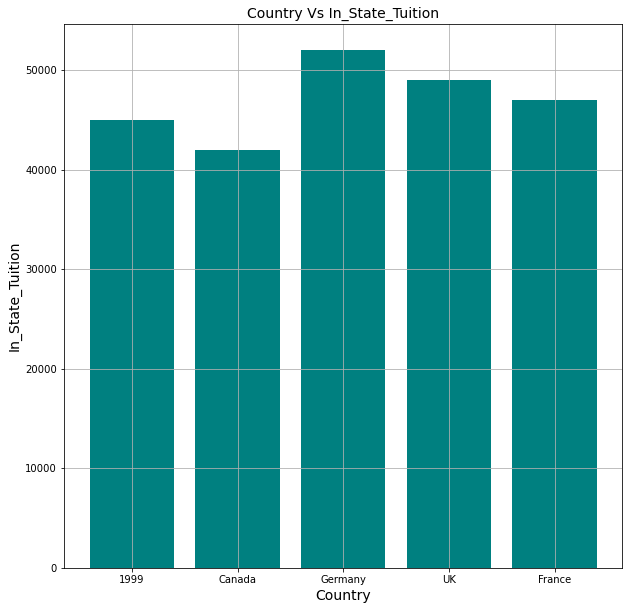

In [67]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

Country = ['1999','Canada','Germany','UK','France']
In_State_Tuition = [45000,42000,52000,49000,47000]

fig, ax = plt.subplots(figsize=(10,10))

ax.bar(Country, In_State_Tuition , color='teal')
ax.set_title('Country Vs In_State_Tuition', fontsize=14)
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('In_State_Tuition', fontsize=14)
ax.grid(True)

In [ ]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart
Year = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
Unemployment_Rate = [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]
  
plt.plot(Year, Unemployment_Rate, color='red', marker='o')
plt.title('Unemployment Rate Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=14)
plt.grid(True)

In [ ]:

# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List

#(Write code here)

In [ ]:

# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one

 #(Write code here)

In [ ]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity

#(Write code here)


In [ ]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

#(Write code here)

In [ ]:

# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

# (write code here)

In [ ]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

#(Write code here)

In [ ]:

# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#(Write code here)

In [ ]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together

#(Write code here)

In [ ]:

# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

#(Write code here)

In [ ]:

# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

#(Write code here)

In [ ]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

#(Write code here)

In [ ]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

#(Write code here)

In [ ]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

#(Write code here)

In [ ]:
# Now, merger the two data frames
# and display the new dataframe

#(Write code here)

In [ ]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

#(Write code here)

In [ ]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

#(Write code here)

In [ ]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

#(Write code here)

#19 Observations of plots/data

LINKS

In [ ]:
https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/
https://github.com/wcj365/python-stats-dataviz/blob/master/assignments/Assignment-07-wang.ipynb
https://github.com/wcj365/python-stats-dataviz/blob/master/code-snippets/zipfile.ipynb
https://www.programmer-books.com/wp-content/uploads/2019/04/Python-for-Data-Analysis-2nd-Edition.pdf
https://stackoverflow.com/questions/2512386/how-to-merge-200-csv-files-in-python
https://github.com/wcj365/python-stats-dataviz/blob/master/top10states.ipynb
https://github.com/wcj365/python-stats-dataviz/blob/master/prep_notes/session_08.md

Practice 

In [ ]:
https://github.com/wcj365/python-stats-dataviz/blob/master/assignments/Assignment-07-wang.ipynb
https://github.com/wcj365/python-stats-dataviz/blob/master/code-snippets/zipfile.ipynb
https://www.programmer-books.com/wp-content/uploads/2019/04/Python-for-Data-Analysis-2nd-Edition.pdf

In [ ]:

df = pd.read_csv(file_names[1])


In [ ]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

In [ ]:
df = pd. read_csv(FILE_PATH,file_names)

In [ ]:
zip_file = ZipFile("Downloads/CollegeScorecard_Raw_Data (1).zip")

zip_info = zip_file.infolist()

file_names  =  zip_info

file_names 

In [ ]:
zip_file = ZipFile("Downloads/CollegeScorecard_Raw_Data (1).zip")

zip_info = zip_file.infolist()

file_names = [x.filename for x in zip_info if x.filename.startswith("CollegeScorecard_Raw_Data/MERGED")]

file_names

In [ ]:
import os
import zipfile
with zipfile.ZipFile("Downloads/CollegeScorecard_Raw_Data (1).zip") as z:
    for filename in z.namelist():
        if not os.path.isdir(filename):
            # read the file
            with z.open(filename) as f:
                for line in f:
                    print (line)

In [ ]:
df = pd.read_csv(open(file_names))

In [ ]:
df = pd.read_csv(FILE_PATH,file_names)

In [ ]:
df = pd.read_csv(open(file_names))
df

In [ ]:
df1 = pd.read_csv("CollegeScorecard_Raw_Data")

In [ ]:
FILE_PATH = "CollegeScorecard_Raw_Data"
file_names = os.listdir(FILE_PATH)
file_names = [x for x in file_names if x.startswith("MERGED")]
file_names
from os import listdir

file_names = [x for x in file_names if x.startswith("MERGED")]
df = pd.concat(map(pd.read_csv, file_names))

In [87]:
df1 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED1996_97_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df1.insert(2, "1997", 1997) 
df2 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED1997_98_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df1.insert(2, "1998", 1998) 
df3 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED1998_99_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df3.insert(2, "1999", 1999) 
df4 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED1999_00_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df4.insert(2, "2000", 2000) 

In [105]:
df1 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED1996_97_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df1.insert(0, "Year","1997") 
df1

,Year,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
0,1997,100636,Community College of the Air Force,AL,0,NaN,NaN
1,1997,100654,Alabama A & M University,AL,5,NaN,NaN
2,1997,100663,University of Alabama at Birmingham,AL,5,NaN,NaN
3,1997,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5,NaN,NaN
4,1997,100690,Amridge University,AL,5,NaN,NaN
...,...,...,...,...,...,...,...
7002,1997,428347,American Institute of Medical-Dental Technology,UT,7,NaN,NaN
7003,1997,428365,INSTITUTO DE ESTETICA Y BELLAZA MARUGIE,PR,9,NaN,NaN
7004,1997,428374,KEISER COLLEGE-DAYTONA,FL,5,NaN,NaN
7005,1997,428392,Klamath Community College,OR,8,NaN,NaN


In [107]:
from os import listdir

filepaths = [f for f in listdir(path) if f.endswith('.csv')]
df = pd.concat(map(pd.read_csv, filepaths))

small_df = df[["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]]

select_UMBC = small_df.loc[df['INSTNM'] == 'University of Maryland-Baltimore County']

UMBC_df = select_UMBC

UMBC_df.insert(0, "Year", [1996,1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], True) 

print(UMBC_df)

UMBC_df.plot(x ='Year', y='TUITIONFEE_IN', kind = 'bar'

NameError: name 'path' is not defined

In [108]:
FILE_PATH = "CollegeScorecard_Raw_Data"
file_names = os.listdir(FILE_PATH)
file_names = [x for x in file_names if x.startswith("MERGED")]
file_names

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [ ]:
from os import listdir

filepaths = from os import listdir

filepaths = [f for f in listdir(path) if f.endswith('.csv')]
df = pd.concat(map(pd.read_csv, filepaths))

small_df = df[["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]]

select_UMBC = small_df.loc[df['INSTNM'] == 'University of Maryland-Baltimore County']

UMBC_df = select_UMBC

UMBC_df.insert(0, "Year", [1996,1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], True) 

print(UMBC_df)

UMBC_df.plot(x ='Year', y='TUITIONFEE_IN', kind = 'bar')
